# Load metadata

In [ ]:
import pandas as pd
metadata_df = pd.read_csv('metadata_with_wer.csv')
metadata_df

,Model,Reference audio path,Source audio path,Audio path,Source speaker ID,Speaker ID,Duration audio,RTF GPU,RTF CPU,SECS,...,Evaluator 4 OS,Evaluator 4 Sim-OS,Evaluator 5 OS,Evaluator 5 Sim-OS,Evaluator 6 OS,Evaluator 6 Sim-OS,Evaluator 7 OS,Evaluator 7 Sim-OS,Evaluator 8 OS,Evaluator 8 Sim-OS
0,so-vits-svc,OriginalAudios/3922/3922_715_000006_000003.wav,OriginalAudios/locutor4/audio_22492_22493_2249...,ClonedAudiosout/3922/locutor4/audio_22492_2249...,locutor4,3922,5.270930,1.242560,1.923357,0.612966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,so-vits-svc,OriginalAudios/3922/3922_715_000023_000005.wav,OriginalAudios/locutor4/audio_16440.wav,ClonedAudiosout/3922/locutor4/audio_16440.out.wav,locutor4,3922,6.339048,1.019879,1.592835,0.735934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,so-vits-svc,OriginalAudios/3922/3922_715_000118_000003.wav,OriginalAudios/locutor4/audio_5732.wav,ClonedAudiosout/3922/locutor4/audio_5732.out.wav,locutor4,3922,9.996190,0.665137,1.212811,0.676058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,so-vits-svc,OriginalAudios/3922/3922_715_000071_000001.wav,OriginalAudios/locutor4/audio_17514_17515.wav,ClonedAudiosout/3922/locutor4/audio_17514_1751...,locutor4,3922,8.463673,0.760370,1.359842,0.675240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,so-vits-svc,OriginalAudios/3922/3922_723_000015_000000.wav,OriginalAudios/locutor4/audio_24488_24489.wav,ClonedAudiosout/3922/locutor4/audio_24488_2448...,locutor4,3922,7.430385,0.908556,1.298693,0.643677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20017,Ground truth,OriginalAudios/3638/3638_758_000003_000004.wav,NaN,OriginalAudios/3638/3638_696_000060_000007.wav,NaN,3638,3.089958,NaN,NaN,0.830264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
20018,Ground truth,OriginalAudios/3638/3638_696_000020_000001.wav,NaN,OriginalAudios/3638/3638_696_000068_000000.wav,NaN,3638,0.730000,NaN,NaN,0.712442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20019,Ground truth,OriginalAudios/3638/3638_758_000022_000000.wav,NaN,OriginalAudios/3638/3638_696_000068_000024.wav,NaN,3638,6.520042,NaN,NaN,0.921110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20020,Ground truth,OriginalAudios/3638/3638_758_000015_000008.wav,NaN,OriginalAudios/3638/3638_696_000038_000010.wav,NaN,3638,3.940000,NaN,NaN,0.863674,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calculate MOS and SimMOS

In [ ]:
import re

columns = metadata_df.columns
pattern = re.compile(r'Evaluator \d+ OS')
os_columns = [column for column in columns if pattern.search(column)]
metadata_df['MOS'] = metadata_df[os_columns].mean(axis=1)

columns = metadata_df.columns
pattern = re.compile(r'Evaluator \d+ Sim-OS')
os_columns = [column for column in columns if pattern.search(column)]
metadata_df['Sim-MOS'] = metadata_df[os_columns].mean(axis=1)

# Get sex and language of each speaker

In [ ]:
languages_dict = {
              # Spanish
              'locutor1': 'Spanish',
              'locutor2': 'Spanish',
              'locutor3': 'Spanish',
              'locutor4': 'Spanish',
              'locutor5': 'Spanish',
              'locutor6': 'Spanish',
              # English
              '3922': 'English',
              '8699': 'English',
              '3638': 'English',
              '3307': 'English',
              '8088': 'English',
              '6209': 'English'
}

sexes_dict = {
              # Spanish
              'locutor1': 'M',
              'locutor2': 'F',
              'locutor3': 'M',
              'locutor4': 'F',
              'locutor5': 'M',
              'locutor6': 'M',
              # English
              '3922': 'F',
              '8699': 'F',
              '3638': 'F',
              '3307': 'M',
              '8088': 'M',
              '6209': 'M'
}

metadata_df['Source speaker language'] = metadata_df['Source speaker ID'].map(languages_dict)
metadata_df['Speaker language'] = metadata_df['Speaker ID'].map(languages_dict)

metadata_df['Source speaker sex'] = metadata_df['Source speaker ID'].map(sexes_dict)
metadata_df['Speaker sex'] = metadata_df['Speaker ID'].map(sexes_dict)

metadata_df

,Model,Reference audio path,Source audio path,Audio path,Source speaker ID,Speaker ID,Duration audio,RTF GPU,RTF CPU,SECS,...,Evaluator 7 OS,Evaluator 7 Sim-OS,Evaluator 8 OS,Evaluator 8 Sim-OS,MOS,Sim-MOS,Source speaker language,Speaker language,Source speaker sex,Speaker sex
0,so-vits-svc,OriginalAudios/3922/3922_715_000006_000003.wav,OriginalAudios/locutor4/audio_22492_22493_2249...,ClonedAudiosout/3922/locutor4/audio_22492_2249...,locutor4,3922,5.270930,1.242560,1.923357,0.612966,...,NaN,NaN,NaN,NaN,NaN,NaN,Spanish,English,F,F
1,so-vits-svc,OriginalAudios/3922/3922_715_000023_000005.wav,OriginalAudios/locutor4/audio_16440.wav,ClonedAudiosout/3922/locutor4/audio_16440.out.wav,locutor4,3922,6.339048,1.019879,1.592835,0.735934,...,NaN,NaN,NaN,NaN,NaN,NaN,Spanish,English,F,F
2,so-vits-svc,OriginalAudios/3922/3922_715_000118_000003.wav,OriginalAudios/locutor4/audio_5732.wav,ClonedAudiosout/3922/locutor4/audio_5732.out.wav,locutor4,3922,9.996190,0.665137,1.212811,0.676058,...,NaN,NaN,NaN,NaN,NaN,NaN,Spanish,English,F,F
3,so-vits-svc,OriginalAudios/3922/3922_715_000071_000001.wav,OriginalAudios/locutor4/audio_17514_17515.wav,ClonedAudiosout/3922/locutor4/audio_17514_1751...,locutor4,3922,8.463673,0.760370,1.359842,0.675240,...,NaN,NaN,NaN,NaN,NaN,NaN,Spanish,English,F,F
4,so-vits-svc,OriginalAudios/3922/3922_723_000015_000000.wav,OriginalAudios/locutor4/audio_24488_24489.wav,ClonedAudiosout/3922/locutor4/audio_24488_2448...,locutor4,3922,7.430385,0.908556,1.298693,0.643677,...,NaN,NaN,NaN,NaN,NaN,NaN,Spanish,English,F,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20017,Ground truth,OriginalAudios/3638/3638_758_000003_000004.wav,NaN,OriginalAudios/3638/3638_696_000060_000007.wav,NaN,3638,3.089958,NaN,NaN,0.830264,...,NaN,5.0,NaN,NaN,NaN,5.0,NaN,English,NaN,F
20018,Ground truth,OriginalAudios/3638/3638_696_000020_000001.wav,NaN,OriginalAudios/3638/3638_696_000068_000000.wav,NaN,3638,0.730000,NaN,NaN,0.712442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN,F
20019,Ground truth,OriginalAudios/3638/3638_758_000022_000000.wav,NaN,OriginalAudios/3638/3638_696_000068_000024.wav,NaN,3638,6.520042,NaN,NaN,0.921110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN,F
20020,Ground truth,OriginalAudios/3638/3638_758_000015_000008.wav,NaN,OriginalAudios/3638/3638_696_000038_000010.wav,NaN,3638,3.940000,NaN,NaN,0.863674,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,English,NaN,F


# Results table without errors (and with outliers)

In [ ]:
metadata_df_gt = metadata_df[metadata_df['Model'] == 'Ground truth']
metadata_df_so_vits = metadata_df[metadata_df['Model'] == 'so-vits-svc']

## SO-VITS POR LANGUAGE Y SEX

In [ ]:
import numpy as np

metrics_list = ['RTF GPU', 'RTF CPU', 'SECS', 'WER', 'MOS', 'Sim-MOS']
group_by_list_so_vits = ['Model', 'Source speaker language', 'Speaker language', 'Source speaker sex', 'Speaker sex']

metadata_df_so_vits.groupby(group_by_list_so_vits)[metrics_list].mean()

RTF GPU  \
Model       Source speaker language Speaker language Source speaker sex Speaker sex             
so-vits-svc English                 English          F                  F            2.696469   
                                                                        M            2.693237   
                                                     M                  F            2.158771   
                                                                        M            2.148899   
                                    Spanish          F                  F            2.629923   
                                                                        M            2.696806   
                                                     M                  F            2.103687   
                                                                        M            2.154780   
            Spanish                 English          F                  F            0.981337   
                                                                        M            0.979283   
                                                     M                  F            0.958218   
                                                                        M            0.955388   
                                    Spanish          F                  F            0.957312   
                                                                        M            0.980024   
                                                     M                  F            0.934695   
                                                                        M            0.955003   

                                                                                      RTF CPU  \
Model       Source speaker language Speaker language Source speaker sex Speaker sex             
so-vits-svc English                 English          F                  F            4.184713   
                                                                        M            4.176766   
                                                     M                  F            3.333011   
                                                                        M            3.336674   
                                    Spanish          F                  F            4.082027   
                                                                        M            4.150414   
                                                     M                  F            3.282712   
                                                                        M            3.346239   
            Spanish                 English          F                  F            1.503115   
                                                                        M            1.505291   
                                                     M                  F            1.487604   
                                                                        M            1.478889   
                                    Spanish          F                  F            1.482878   
                                                                        M            1.525712   
                                                     M                  F            1.443743   
                                                                        M            1.483063   

                                                                                         SECS  \
Model       Source speaker language Speaker language Source speaker sex Speaker sex             
so-vits-svc English                 English          F                  F            0.776107   
                                                                        M            0.770244   
                                                     M                  F            0.788505   
                                                                        M            0.780991   
          

## GT POR LANGUAGES Y SEX

In [ ]:
group_by_list_gt = ['Model', 'Speaker language', 'Speaker sex']

metadata_df_gt.groupby(group_by_list_gt)[metrics_list].mean()

RTF GPU  RTF CPU      SECS  \
Model        Speaker language Speaker sex                               
Ground truth English          F                NaN      NaN  0.796478   
                              M                NaN      NaN  0.774003   
             Spanish          F                NaN      NaN  0.930727   
                              M                NaN      NaN  0.897920   

                                                WER       MOS   Sim-MOS  
Model        Speaker language Speaker sex                                
Ground truth English          F            0.082215  4.759820  4.708050  
                              M            0.085956  4.744490  4.718968  
             Spanish          F            0.077280  4.821016  4.735811  
                              M            0.086924  4.828715  4.747590

## SO-VITS POR LANGUAGES (SIN SEX)

In [ ]:
metadata_df_so_vits.groupby(['Model','Source speaker language', 'Speaker language'])[metrics_list].mean()

RTF GPU   RTF CPU  \
Model       Source speaker language Speaker language                       
so-vits-svc English                 English           2.424676  3.757210   
                                    Spanish           2.406130  3.726341   
            Spanish                 English           0.964639  1.490232   
                                    Spanish           0.956414  1.483938   

                                                          SECS       WER  \
Model       Source speaker language Speaker language                       
so-vits-svc English                 English           0.779044  0.109782   
                                    Spanish           0.768425  0.174379   
            Spanish                 English           0.740073  0.195987   
                                    Spanish           0.889658  0.128179   

                                                           MOS   Sim-MOS  
Model       Source speaker language Speaker language                      
so-vits-svc English                 English           4.578947  4.550000  
                                    Spanish           4.235294  4.352941  
            Spanish                 English           3.481481  4.147059  
                                    Spanish           4.327869  4.775000

## GT POR LANGUAGES (SIN SEX)

In [ ]:
metadata_df_gt.groupby(['Model', 'Speaker language'])[metrics_list].mean()

RTF GPU  RTF CPU      SECS       WER       MOS  \
Model        Speaker language                                                   
Ground truth English               NaN      NaN  0.786344  0.083902  4.752938   
             Spanish               NaN      NaN  0.908771  0.083735  4.826075   

                                Sim-MOS  
Model        Speaker language            
Ground truth English           4.712946  
             Spanish           4.743651

# Results table with errors (and with outliers)

## SO-VITS POR LANGUAGES Y SEX

In [ ]:
sexes_list = ["M->M", "F->F", "M->F", "F->M"]
metrics_list = ['RTF GPU', 'RTF CPU', 'SECS', 'WER', 'MOS', 'Sim-MOS']

array1 = [elem for elem in sexes_list for _ in range(len(metrics_list))]
array2 = metrics_list * len(sexes_list)

arrays = [array1, array2]
tuples = list(zip(*arrays))

columns = pd.MultiIndex.from_tuples(tuples)

indices = ['English->English', 'Spanish->Spanish', 'English->Spanish', 'Spanish->English']
results_df = pd.DataFrame(np.nan, index=indices, columns=columns)
# results_df

In [ ]:
for sexes in sexes_list:
  source_speaker_sex, speaker_sex = sexes.split('->')

  for index in indices:
    speaker_language, source_speaker_language = index.split('->')

    metadata_df_filtered = metadata_df_so_vits[
          (metadata_df_so_vits['Source speaker sex'] == source_speaker_sex) &
          (metadata_df_so_vits['Speaker sex'] == speaker_sex) &
          (metadata_df_so_vits['Source speaker language'] == source_speaker_language) &
          (metadata_df_so_vits['Speaker language'] == speaker_language)
          ]

    for metric in metrics_list:
      series = metadata_df_filtered[metric]

      mean = series.mean()
      n = series.count()
      error = series.std() / np.sqrt(n)

      result = str(round(mean, 3)) + ' +- ' + str(round(error, 3))

      results_df.loc[index, (sexes, metric)] = result

results_df

M->M                                  \
                         RTF GPU         RTF CPU            SECS   
English->English  2.149 +- 0.064  3.337 +- 0.103  0.781 +- 0.004   
Spanish->Spanish  0.955 +- 0.005  1.483 +- 0.009  0.878 +- 0.001   
English->Spanish  0.955 +- 0.005  1.479 +- 0.009  0.734 +- 0.003   
Spanish->English  2.155 +- 0.045   3.346 +- 0.07  0.768 +- 0.002   

                                                                  \
                             WER             MOS         Sim-MOS   
English->English  0.103 +- 0.006  4.875 +- 0.125  4.286 +- 0.286   
Spanish->Spanish  0.136 +- 0.003   4.36 +- 0.162  4.667 +- 0.142   
English->Spanish    0.2 +- 0.005   3.35 +- 0.196  3.818 +- 0.182   
Spanish->English  0.178 +- 0.017  4.296 +- 0.129    4.1 +- 0.277   

                            F->F                                  \
                         RTF GPU         RTF CPU            SECS   
English->English   2.696 +- 0.08  4.185 +- 0.124  0.776 +- 0.004   
Spanish->Spanish  0.957 +- 0.012  1.483 +- 0.023  0.911 +- 0.002   
English->Spanish  0.981 +- 0.007  1.503 +- 0.013  0.748 +- 0.003   
Spanish->English   2.63 +- 0.078  4.082 +- 0.124  0.771 +- 0.003   

                                  ...            M->F                  \
                             WER  ...            SECS             WER   
English->English  0.108 +- 0.007  ...  0.789 +- 0.003  0.099 +- 0.005   
Spanish->Spanish  0.104 +- 0.007  ...  0.915 +- 0.001   0.13 +- 0.004   
English->Spanish  0.182 +- 0.006  ...   0.75 +- 0.002  0.206 +- 0.005   
Spanish->English  0.161 +- 0.009  ...  0.786 +- 0.003  0.148 +- 0.008   

                                                            F->M  \
                             MOS         Sim-MOS         RTF GPU   
English->English    4.4 +- 0.222  4.786 +- 0.114  2.693 +- 0.065   
Spanish->Spanish  3.938 +- 0.266  4.929 +- 0.071   0.98 +- 0.006   
English->Spanish  3.333 +- 0.181  4.417 +- 0.229  0.979 +- 0.007   
Spanish->English  4.214 +- 0.261    4.5 +- 0.289  2.697 +- 0.057   

                                                                  \
                         RTF CPU            SECS             WER   
English->English  4.177 +- 0.104   0.77 +- 0.003  0.126 +- 0.006   
Spanish->Spanish  1.526 +- 0.011  0.877 +- 0.002   0.12 +- 0.004   
English->Spanish  1.505 +- 0.013  0.725 +- 0.004  0.184 +- 0.006   
Spanish->English   4.15 +- 0.087  0.759 +- 0.002  0.191 +- 0.008   

                                                  
                             MOS         Sim-MOS  
English->English  4.545 +- 0.109  4.364 +- 0.203  
Spanish->Spanish  4.588 +- 0.123  4.778 +- 0.147  
English->Spanish  3.818 +- 0.122  4.167 +- 0.307  
Spanish->English  4.226 +- 0.145  4.333 +- 0.159  

[4 rows x 24 columns]

## GT POR LANGUAGES Y SEX

In [ ]:
sexes_list = ["M", "F"]

array1 = [elem for elem in sexes_list for _ in range(len(metrics_list))]
array2 = metrics_list * len(sexes_list)

arrays = [array1, array2]
tuples = list(zip(*arrays))

columns = pd.MultiIndex.from_tuples(tuples)

indices = ['English', 'Spanish']
results_df = pd.DataFrame(np.nan, index=indices, columns=columns)
# results_df

In [ ]:
for speaker_sex in sexes_list:
  for speaker_language in indices:

    metadata_df_filtered = metadata_df_gt[
          (metadata_df_gt['Speaker sex'] ==  speaker_sex) &
          (metadata_df_gt['Speaker language'] == speaker_language)
          ]

    for metric in metrics_list:
      series = metadata_df_filtered[metric]

      mean = series.mean()
      n = series.count()
      error = series.std() / np.sqrt(n)

      result = str(round(mean, 3)) + ' +- ' + str(round(error, 3))

      results_df.loc[speaker_language, (speaker_sex, metric)] = result

results_df

M                                              \
            RTF GPU     RTF CPU            SECS             WER   
English  nan +- nan  nan +- nan  0.774 +- 0.004  0.086 +- 0.006   
Spanish  nan +- nan  nan +- nan  0.898 +- 0.001  0.087 +- 0.002   

                                                  F              \
                    MOS         Sim-MOS     RTF GPU     RTF CPU   
English  4.744 +- 0.034  4.719 +- 0.036  nan +- nan  nan +- nan   
Spanish  4.829 +- 0.014  4.748 +- 0.017  nan +- nan  nan +- nan   

                                                                        
                   SECS             WER            MOS         Sim-MOS  
English  0.796 +- 0.003  0.082 +- 0.004  4.76 +- 0.032   4.708 +- 0.03  
Spanish  0.931 +- 0.001  0.077 +- 0.002  4.821 +- 0.02  4.736 +- 0.025

## SO-VITS POR LANGUAGES (SIN SEX)

In [ ]:
indices = ['English->English', 'Spanish->Spanish', 'English->Spanish', 'Spanish->English']
results_df = pd.DataFrame(np.nan, index=indices, columns=metrics_list)
# results_df

In [ ]:
for index in indices:
  speaker_language, source_speaker_language = index.split('->')

  metadata_df_filtered = metadata_df_so_vits[
        (metadata_df_so_vits['Source speaker language'] == source_speaker_language) &
        (metadata_df_so_vits['Speaker language'] == speaker_language)
        ]

  for metric in metrics_list:
    series = metadata_df_filtered[metric]

    mean = series.mean()
    n = series.count()
    error = series.std() / np.sqrt(n)

    result = str(round(mean, 3)) + ' +- ' + str(round(error, 3))

    results_df.loc[index, metric] = result

results_df

,RTF GPU,RTF CPU,SECS,WER,MOS,Sim-MOS
English->English,2.425 +- 0.033,3.757 +- 0.052,0.779 +- 0.002,0.11 +- 0.003,4.579 +- 0.093,4.55 +- 0.113
Spanish->Spanish,0.956 +- 0.003,1.484 +- 0.006,0.89 +- 0.001,0.128 +- 0.002,4.328 +- 0.106,4.775 +- 0.067
English->Spanish,0.965 +- 0.003,1.49 +- 0.005,0.74 +- 0.001,0.196 +- 0.003,3.481 +- 0.101,4.147 +- 0.128
Spanish->English,2.406 +- 0.03,3.726 +- 0.046,0.768 +- 0.001,0.174 +- 0.007,4.235 +- 0.09,4.353 +- 0.119


## GT POR LANGUAGES (SIN SEX)

In [ ]:
indices = ['English', 'Spanish']
results_df = pd.DataFrame(np.nan, index=indices, columns=metrics_list)
# results_df

In [ ]:
for speaker_language in indices:

  metadata_df_filtered = metadata_df_gt[
        (metadata_df_gt['Speaker language'] == speaker_language)
        ]

  for metric in metrics_list:
    series = metadata_df_filtered[metric]

    mean = series.mean()
    n = series.count()
    error = series.std() / np.sqrt(n)

    result = str(round(mean, 3)) + ' +- ' + str(round(error, 3))

    results_df.loc[speaker_language, metric] = result

results_df

,RTF GPU,RTF CPU,SECS,WER,MOS,Sim-MOS
English,nan +- nan,nan +- nan,0.786 +- 0.002,0.084 +- 0.004,4.753 +- 0.023,4.713 +- 0.023
Spanish,nan +- nan,nan +- nan,0.909 +- 0.001,0.084 +- 0.001,4.826 +- 0.012,4.744 +- 0.014


# ¿XQ RTF EN ESPAÑOL ES MENOR QUE EN INGLÉS?
Es porque este modelo tiene un tiempo de inferencia que no depende de la duración del audio original, y al tener el dataset en español más duración promedio que el inglés, el RTF es menor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os
import shutil
import glob
import pandas as pd
import numpy as np
from tqdm import tqdm

def unzip_files(zip_file_path, destination_folder):

  # destination_folder = zip_file_path.split('.zip')[0]

  # Create the destination folder if it doesn't exist
  if not os.path.exists(destination_folder):
      os.makedirs(destination_folder)

  # Open the zip file
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      # Get total number of files to extract
      total_files = len(zip_ref.namelist())

      # Extract all contents to the destination folder with progress bar
      for file in tqdm(zip_ref.namelist(), total=total_files, desc=f'Extracting {zip_file_path}', unit='files'):
          zip_ref.extract(file, destination_folder)

In [ ]:
unzip_files('/content/drive/MyDrive/Colab Notebooks/TFM/Exp2/OriginalAudios.zip', 'OriginalAudios')
unzip_files('/content/drive/MyDrive/Colab Notebooks/TFM/Exp2/ClonedAudiosout.zip', 'ClonedAudiosout')

Extracting /content/drive/MyDrive/Colab Notebooks/TFM/Exp2/OriginalAudios.zip: 100%|██████████| 7171/7171 [00:43<00:00, 165.95files/s]
Extracting /content/drive/MyDrive/Colab Notebooks/TFM/Exp2/ClonedAudiosout.zip: 100%|██████████| 13355/13355 [02:19<00:00, 95.90files/s] 


In [ ]:
import wave
def get_audio_length(file_path):
    with wave.open(file_path, 'rb') as audio_file:
        # Get the number of frames and the frame rate
        num_frames = audio_file.getnframes()
        frame_rate = audio_file.getframerate()

        # Calculate the duration in seconds
        duration = num_frames / frame_rate

    return duration

In [ ]:
metadata_df['Duration source audio'] = metadata_df['Source audio path'].map(get_audio_length, na_action='ignore')
metadata_df['Infer time'] = metadata_df['RTF GPU'] * metadata_df['Duration source audio']

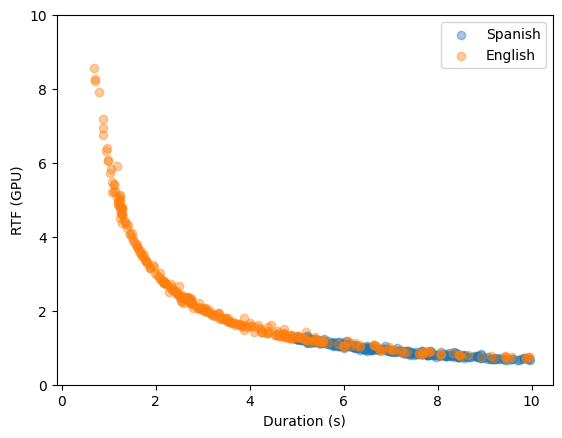

In [ ]:
import matplotlib.pyplot as plt

sample_df = metadata_df.sample(1000, random_state=33)

durations_sp = sample_df[sample_df['Source speaker language'] == 'Spanish']['Duration source audio']
durations_en = sample_df[sample_df['Source speaker language'] == 'English']['Duration source audio']
rtf_sp = sample_df[sample_df['Source speaker language'] == 'Spanish']['RTF GPU']
rtf_en = sample_df[sample_df['Source speaker language'] == 'English']['RTF GPU']

plt.figure()
plt.scatter(durations_sp, rtf_sp, label='Spanish', alpha=0.4)
plt.scatter(durations_en, rtf_en, label='English', alpha=0.4)
plt.ylabel('RTF (GPU)')
plt.xlabel('Duration (s)')
plt.ylim(0, 10)
plt.legend()
plt.show()

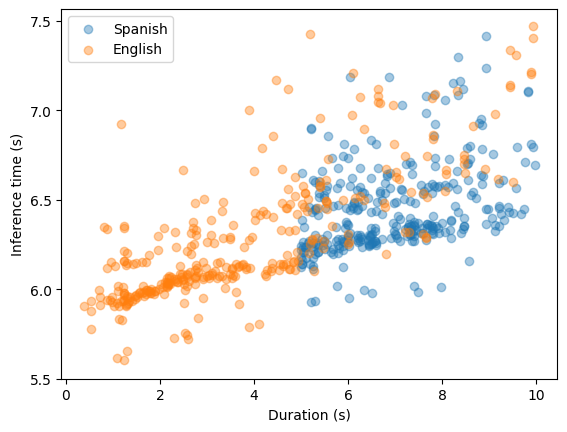

In [ ]:
import matplotlib.pyplot as plt

infer_sp = sample_df[sample_df['Source speaker language'] == 'Spanish']['Infer time']
infer_en = sample_df[sample_df['Source speaker language'] == 'English']['Infer time']

plt.figure()
plt.scatter(durations_sp, infer_sp, label='Spanish', alpha=0.4)
plt.scatter(durations_en, infer_en, label='English', alpha=0.4)
plt.ylabel('Inference time (s)')
plt.xlabel('Duration (s)')
# plt.ylim(5.5, 8)
plt.yticks([5.5, 6, 6.5, 7, 7.5])
plt.legend()
plt.show()

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

met = metadata_df.dropna(subset=['RTF GPU'])

rtf_dur_cor_pearson, _ = pearsonr(met['Duration source audio'], met['RTF GPU'])
rtf_dur_cor_spearman, _ = spearmanr(met['Duration source audio'], met['RTF GPU'])
infer_dur_cor_pearson, _ = pearsonr(met['Duration source audio'], met['Infer time'])
infer_dur_cor_spearman, _ = spearmanr(met['Duration source audio'], met['Infer time'])

print(rtf_dur_cor_pearson, rtf_dur_cor_spearman, infer_dur_cor_pearson, infer_dur_cor_spearman)

-0.7773694763210262 -0.9934602408957374 0.6308403324279274 0.6779482635306437


# Boxplots

In [ ]:
metadata_df['Model'] = ['So-vits-svc' if model == 'so-vits-svc' else 'Ground truth' for model in metadata_df['Model']]
# metadata_df['hue'] = metadata_df["Speaker language"] + "->" + metadata_df["Source speaker language"]
# metadata_df.loc[metadata_df['Model'] == 'Ground truth', 'hue'] = metadata_df.loc[metadata_df['Model'] == 'Ground truth', 'Speaker language']
metadata_df['Languages'] = metadata_df["Speaker language"] + "->" + metadata_df["Source speaker language"]
metadata_df.loc[metadata_df['Model'] == 'Ground truth', 'Languages'] = metadata_df.loc[metadata_df['Model'] == 'Ground truth', 'Speaker language']
metadata_df['Sexes'] = metadata_df["Source speaker sex"] + "->" + metadata_df["Speaker sex"]
metadata_df.loc[metadata_df['Model'] == 'Ground truth', 'Sexes'] = metadata_df.loc[metadata_df['Model'] == 'Ground truth', 'Speaker sex']
# metadata_df

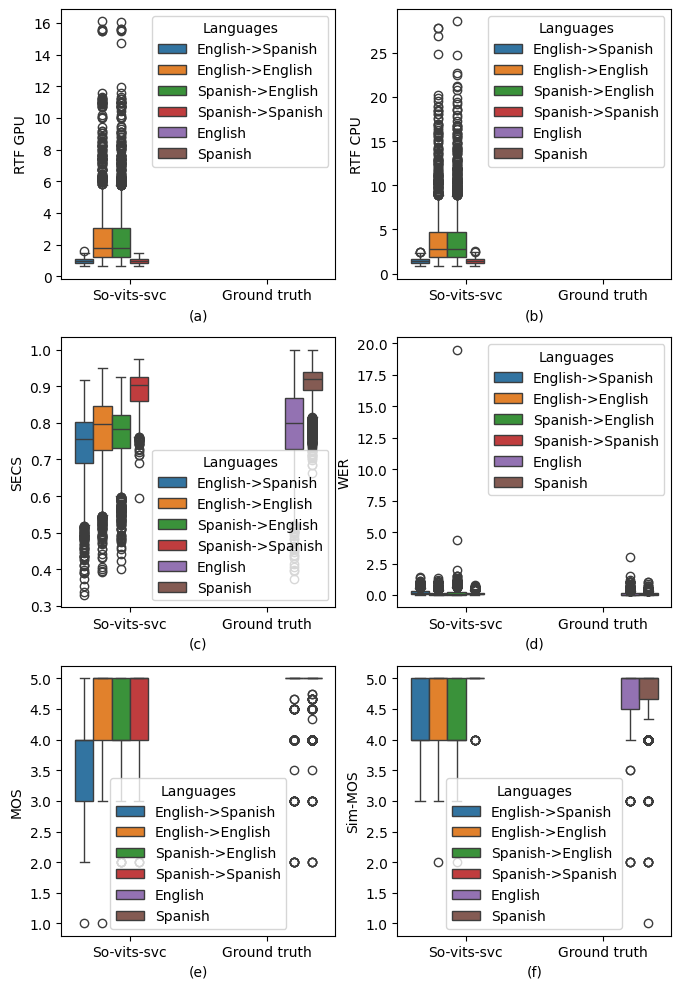

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics_list = ['RTF GPU', 'RTF CPU', 'SECS', 'WER', 'MOS', 'Sim-MOS']
subfigures_list = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

# Create a 3 x 2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(7, 10))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate over metrics and axes to plot each metric on its corresponding subplot
i = 0
for metric, ax in zip(metrics_list, axes):
    sns.boxplot(data=metadata_df, x="Model", y=metric, hue='Languages', ax=ax)
    ax.set_xlabel(subfigures_list[i])
    i += 1

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()
plt.show()

In [ ]:
metrics_list = ['RTF GPU', 'RTF CPU', 'SECS', 'WER', 'MOS', 'Sim-MOS']

for hue in metadata_df['Languages'].unique():
  indices = metadata_df['Languages'] == hue

  for metric in metrics_list:

    series = metadata_df[metric][indices]

    q1 = np.percentile(series, 25)
    q3 = np.percentile(series, 75)
    iqr = q3 - q1

    outlier_threshold = 1.5 * iqr

    outliers = (series < q1 - outlier_threshold) | (series > q3 + outlier_threshold)
    metadata_df.loc[indices, f'outlier {metric}'] = outliers

# metadata_df

In [ ]:
metadata_df_so_vits = metadata_df[metadata_df['Model'] == 'So-vits-svc']
metadata_df_gt = metadata_df[metadata_df['Model'] == 'Ground truth']

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# metrics_list = ['RTF GPU', 'RTF CPU', 'SECS', 'WER', 'MOS', 'Sim-MOS']
# subfigures_list = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

# # Create a 3 x 2 grid of subplots
# fig, axes = plt.subplots(3, 2, figsize=(7, 10))

# # Flatten the axes array to make it easier to iterate over
# axes = axes.flatten()

# # Iterate over metrics and axes to plot each metric on its corresponding subplot
# i = 0
# for metric, ax in zip(metrics_list, axes):
#     sns.boxplot(data=metadata_df[metadata_df[f'outlier {metric}'] == False], x="Model", y=metric, hue='hue', ax=ax, legend=False)
#     ax.set_xlabel(subfigures_list[i])
#     i += 1

# # Adjust layout to prevent overlapping of subplots
# plt.tight_layout()
# plt.show()

# Results table without outliers

## SO-VITS POR LANGUAGES Y SEX

In [ ]:
sexes_list = ["M->M", "F->F", "M->F", "F->M"]
metrics_list = ['RTF GPU', 'RTF CPU', 'SECS', 'WER', 'MOS', 'Sim-MOS']

array1 = [elem for elem in sexes_list for _ in range(len(metrics_list))]
array2 = metrics_list * len(sexes_list)

arrays = [array1, array2]
tuples = list(zip(*arrays))

columns = pd.MultiIndex.from_tuples(tuples)

indices = ['English->English', 'Spanish->Spanish', 'English->Spanish', 'Spanish->English']
results_df = pd.DataFrame(np.nan, index=indices, columns=columns)
# results_df

In [ ]:
for sex in sexes_list:
  for language in indices:

    metadata_df_filtered = metadata_df_so_vits[(metadata_df_so_vits['Sexes'] == sex) & (metadata_df_so_vits['Languages'] == language)]

    for metric in metrics_list:
      series = metadata_df_filtered[metadata_df_filtered[f'outlier {metric}'] == False][metric]
      series = series.dropna()

      mean = series.mean()
      n = series.count()
      error = series.std() / np.sqrt(n)

      result = str(round(mean, 3)) + ' +- ' + str(round(error, 3))

      results_df.loc[language, (sex, metric)] = result

results_df

M->M                                  \
                         RTF GPU         RTF CPU            SECS   
English->English   1.982 +- 0.05  2.981 +- 0.074   0.79 +- 0.003   
Spanish->Spanish  0.955 +- 0.005  1.483 +- 0.009   0.88 +- 0.001   
English->Spanish  0.955 +- 0.005  1.479 +- 0.009   0.74 +- 0.002   
Spanish->English  1.966 +- 0.035  3.051 +- 0.054  0.774 +- 0.002   

                                                                  \
                             WER             MOS         Sim-MOS   
English->English  0.077 +- 0.004  4.875 +- 0.125  4.286 +- 0.286   
Spanish->Spanish  0.124 +- 0.003   4.36 +- 0.162  4.667 +- 0.142   
English->Spanish  0.182 +- 0.004   3.35 +- 0.196  3.818 +- 0.182   
Spanish->English  0.135 +- 0.004  4.296 +- 0.129    4.1 +- 0.277   

                            F->F                                  \
                         RTF GPU         RTF CPU            SECS   
English->English  2.339 +- 0.052  3.602 +- 0.081  0.781 +- 0.004   
Spanish->Spanish  0.957 +- 0.012  1.483 +- 0.023  0.911 +- 0.002   
English->Spanish  0.981 +- 0.007  1.503 +- 0.013  0.751 +- 0.003   
Spanish->English  2.287 +- 0.051  3.493 +- 0.079  0.777 +- 0.003   

                                  ...            M->F                  \
                             WER  ...            SECS             WER   
English->English  0.076 +- 0.004  ...  0.792 +- 0.003  0.078 +- 0.003   
Spanish->Spanish    0.1 +- 0.007  ...  0.915 +- 0.001  0.118 +- 0.004   
English->Spanish  0.169 +- 0.005  ...  0.752 +- 0.002  0.189 +- 0.004   
Spanish->English  0.127 +- 0.006  ...  0.792 +- 0.002  0.128 +- 0.006   

                                                            F->M  \
                             MOS         Sim-MOS         RTF GPU   
English->English    4.4 +- 0.222  4.786 +- 0.114  2.329 +- 0.043   
Spanish->Spanish  3.938 +- 0.266  4.929 +- 0.071   0.98 +- 0.006   
English->Spanish  3.333 +- 0.181  4.417 +- 0.229  0.979 +- 0.007   
Spanish->English  4.214 +- 0.261    4.5 +- 0.289  2.329 +- 0.037   

                                                                  \
                         RTF CPU            SECS             WER   
English->English  3.611 +- 0.067  0.777 +- 0.003  0.082 +- 0.004   
Spanish->Spanish  1.523 +- 0.011  0.879 +- 0.002  0.113 +- 0.004   
English->Spanish  1.504 +- 0.013  0.736 +- 0.003  0.171 +- 0.005   
Spanish->English  3.599 +- 0.058  0.768 +- 0.002   0.14 +- 0.005   

                                                  
                             MOS         Sim-MOS  
English->English  4.545 +- 0.109  4.364 +- 0.203  
Spanish->Spanish  4.588 +- 0.123  4.778 +- 0.147  
English->Spanish  3.818 +- 0.122  4.167 +- 0.307  
Spanish->English  4.226 +- 0.145  4.333 +- 0.159  

[4 rows x 24 columns]

## GT POR LANGUAGES Y SEX

In [ ]:
sexes_list = ["M", "F"]

array1 = [elem for elem in sexes_list for _ in range(len(metrics_list))]
array2 = metrics_list * len(sexes_list)

arrays = [array1, array2]
tuples = list(zip(*arrays))

columns = pd.MultiIndex.from_tuples(tuples)

indices = ['English', 'Spanish']
results_df = pd.DataFrame(np.nan, index=indices, columns=columns)
# results_df

In [ ]:
for sex in sexes_list:
  for language in indices:

    metadata_df_filtered = metadata_df_gt[(metadata_df_gt['Sexes'] == sex) & (metadata_df_gt['Languages'] == language)]

    for metric in metrics_list:
      series = metadata_df_filtered[metadata_df_filtered[f'outlier {metric}'] == False][metric]
      series = series.dropna()

      mean = series.mean()
      n = series.count()
      error = series.std() / np.sqrt(n)

      result = str(round(mean, 3)) + ' +- ' + str(round(error, 3))

      results_df.loc[language, (sex, metric)] = result

results_df

M                                              \
            RTF GPU     RTF CPU            SECS             WER   
English  nan +- nan  nan +- nan  0.784 +- 0.004  0.054 +- 0.003   
Spanish  nan +- nan  nan +- nan  0.907 +- 0.001  0.077 +- 0.001   

                                                  F              \
                    MOS         Sim-MOS     RTF GPU     RTF CPU   
English  4.744 +- 0.034  4.719 +- 0.036  nan +- nan  nan +- nan   
Spanish  4.829 +- 0.014  4.748 +- 0.017  nan +- nan  nan +- nan   

                                                                        
                   SECS             WER            MOS         Sim-MOS  
English  0.799 +- 0.003  0.051 +- 0.002  4.76 +- 0.032   4.708 +- 0.03  
Spanish  0.931 +- 0.001   0.07 +- 0.002  4.821 +- 0.02  4.736 +- 0.025

## SO-VITS POR LANGUAGES (SIN SEX)


In [ ]:
metrics_list = ['RTF GPU', 'RTF CPU', 'SECS', 'WER', 'MOS', 'Sim-MOS']
indices = ['English->English', 'Spanish->Spanish', 'English->Spanish', 'Spanish->English']
results_df = pd.DataFrame(np.nan, index=indices, columns=metrics_list)
# results_df

In [ ]:
for language in indices:

  metadata_df_filtered = metadata_df_so_vits[metadata_df_so_vits['Languages'] == language]

  for metric in metrics_list:
    series = metadata_df_filtered[metadata_df_filtered[f'outlier {metric}'] == False][metric]
    series = series.dropna()

    mean = series.mean()
    n = series.count()
    error = series.std() / np.sqrt(n)

    result = str(round(mean, 3)) + ' +- ' + str(round(error, 3))

    results_df.loc[language, metric] = result

results_df

,RTF GPU,RTF CPU,SECS,WER,MOS,Sim-MOS
English->English,2.154 +- 0.023,3.307 +- 0.036,0.785 +- 0.002,0.079 +- 0.002,4.579 +- 0.093,4.55 +- 0.113
Spanish->Spanish,0.956 +- 0.003,1.483 +- 0.006,0.891 +- 0.001,0.118 +- 0.002,4.328 +- 0.106,4.775 +- 0.067
English->Spanish,0.964 +- 0.003,1.489 +- 0.005,0.745 +- 0.001,0.18 +- 0.002,3.481 +- 0.101,4.147 +- 0.128
Spanish->English,2.134 +- 0.021,3.295 +- 0.032,0.776 +- 0.001,0.134 +- 0.003,4.235 +- 0.09,4.353 +- 0.119


## GT POR LANGUAGES (SIN SEX)

In [ ]:
metrics_list = ['RTF GPU', 'RTF CPU', 'SECS', 'WER', 'MOS', 'Sim-MOS']
indices = ['English', 'Spanish']
results_df = pd.DataFrame(np.nan, index=indices, columns=metrics_list)
# results_df

In [ ]:
for language in indices:

  metadata_df_filtered = metadata_df_gt[metadata_df_gt['Languages'] == language]

  for metric in metrics_list:
    series = metadata_df_filtered[metadata_df_filtered[f'outlier {metric}'] == False][metric]
    series = series.dropna()

    mean = series.mean()
    n = series.count()
    error = series.std() / np.sqrt(n)

    result = str(round(mean, 3)) + ' +- ' + str(round(error, 3))

    results_df.loc[language, metric] = result

results_df

,RTF GPU,RTF CPU,SECS,WER,MOS,Sim-MOS
English,nan +- nan,nan +- nan,0.792 +- 0.002,0.052 +- 0.002,4.753 +- 0.023,4.713 +- 0.023
Spanish,nan +- nan,nan +- nan,0.915 +- 0.001,0.075 +- 0.001,4.826 +- 0.012,4.744 +- 0.014
